# 『点過程の時系列解析』第７章　
## 点過程のシュミレーション

## 7.1 乱数の生成

7.1.1 逆関数法

__アルゴリズム7.1__ :確率密度関数が$p(x)$に従う乱数の生成(逆関数法)

1. $U$を$[0,1]$の一様乱数とする.
2. $p(x)$の累積分布関数の逆関数を$F^{-1}(x)$を用いて,$x=F^{-1}(U)$を返す.

今回は確率密度関数が
$$p(x)=\frac{1}{\sqrt{2\pi}}\exp\left(-\frac{x^2}{2}\right)$$
となる標準正規分布に従う乱数を生成する.

Generated random numbers:
[0.9639882663195256, 2.5581543244407756, -0.459061316120926, -0.14956248567782232, -1.603966562094215, -1.0097130190421515, -0.4977714030381412, 0.9863565421109137, -0.41311378184732694, -1.5402906819447137]


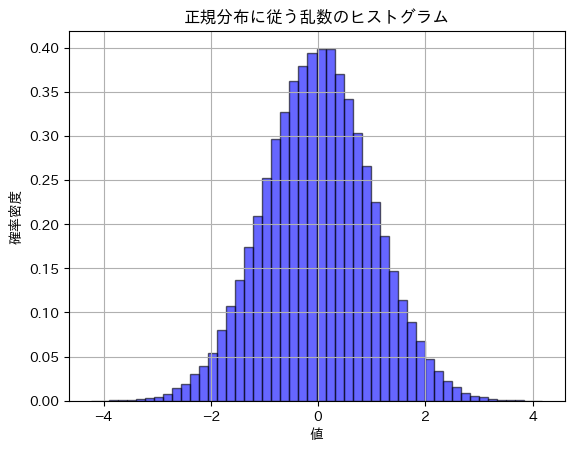

In [1]:
import random
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import japanize_matplotlib

def inverse_transform_sampling(mu, sigma):
    U = random.random()
    X = norm.ppf(U, loc=mu, scale=sigma)
    return X

# 正規分布の平均 (μ) と分散 (σ^2)
mean = 0
variance = 1

# 100,000個の乱数を生成してリストに格納
random_numbers = [inverse_transform_sampling(mean, math.sqrt(variance)) for _ in range(100000)]

# 生成された乱数の先頭10個を表示
print("Generated random numbers:")
print(random_numbers[:10])

# ヒストグラムをプロット
plt.hist(random_numbers, bins=50, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('値')
plt.ylabel('確率密度')
plt.title('正規分布に従う乱数のヒストグラム')
plt.grid(True)
plt.show()


7.1.2 棄却法

__アルゴリズム7.2__ :確率密度関数が$p(x)$に従う乱数の生成(棄却法)

1. 提案分布が$p*(x)$叫および，定義域全域で $p(x)≦αp*(x)$を満たす最小の$α$ を決める．
2. 以下を繰り返す．

 2.1 提 案 分 布 がp*(x) に従う乱数$x*$（候補）を生成する．

 2.2 一様乱数 U と採択確率 $r ← p(x*)/αp*(x*)$に対して，
 もし $U ≦r$ ならば候補を採択しステップ 3に進み，そうでなければ候補を棄却 しステ ップ 2.1 に戻る．

3. 採択された候補 $x*$ を返す．


今回の目標分布は確率密度関数が
$$p(x)=\lambda\exp(-\lambda x) (x\geq0)$$
となる指数分布とし、  
提案分布は確率密度関数が  
$$p(x)=\begin{cases}
1 & (0\leq x\leq 1)\\
0 & (otherwise)
\end{cases}$$
となる一様分布とする.



Generated random numbers:
[1.7740339646799508, 0.5677441670801997, 1.397224764843018, 0.41390729044738894, 1.0242341217269813, 0.26018334285386246, 1.4541707794091514, 0.030822609707600868, 0.21542320653907265, 0.2134942557000047]


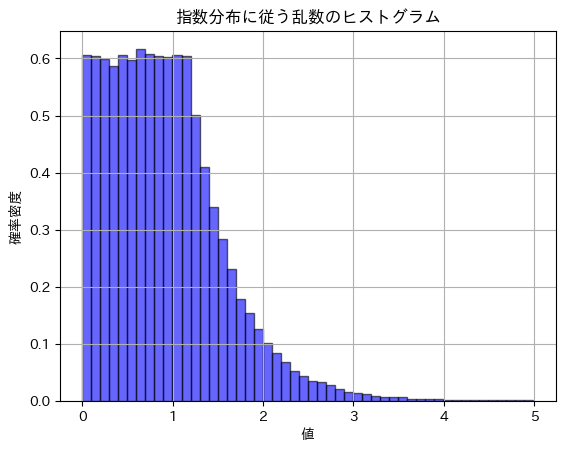

In [4]:
import random
import math
import matplotlib.pyplot as plt

def exponential_pdf(x, lambd):
    return lambd * math.exp(-lambd * x)

def rejection_sampling_exponential(lambd, num_samples):
    M = 10 / lambd  # 適切な値を選ぶ
    alpha = 1 / M

    samples = []
    while len(samples) < num_samples:
        x_star = random.uniform(0, M)
        u1 = random.uniform(0, 1)
        u2 = random.uniform(0, 1)

        if u2 <= exponential_pdf(x_star, lambd) / (alpha * 1):
            samples.append(x_star)

    return samples

# 指数分布のパラメータ
lambd = 2.0

# 乱数を100,000個生成
num_samples = 100000
random_numbers = rejection_sampling_exponential(lambd, num_samples)

# 生成された乱数の先頭10個を表示
print("Generated random numbers:")
print(random_numbers[:10])

# ヒストグラムをプロット
plt.hist(random_numbers, bins=50, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('値')
plt.ylabel('確率密度')
plt.title('指数分布に従う乱数のヒストグラム')
plt.grid(True)
plt.show()

7.1.3 各種の分布に従う乱数の生成  

- 指数分布  
逆関数法を用いることで,期待値\betaの指数分布
$p(x)=\frac{1}{\beta}\exp\left(-\frac{x}{\beta}\right) (x\geq0)$
に従う乱数を生成することができる.  
指数分布の累積分布関数の逆関数は
$F^{-1}(x)=-\beta\log(1-x)$
である.
  

__アルゴリズム7.3__ 期待値\betaの指数分布に従う乱数の生成
1. 一様乱数$U$を生成し,$x=-\beta\log(U)$を返す.

First 10 generated random numbers:
[0.7721447765625334, 0.31381696306885176, 2.1860920651834745, 1.148363276261933, 0.33852771028388023, 3.4120977409060194, 0.5246634348556438, 3.8689738151169184, 4.068905453919855, 0.6525923323631536]


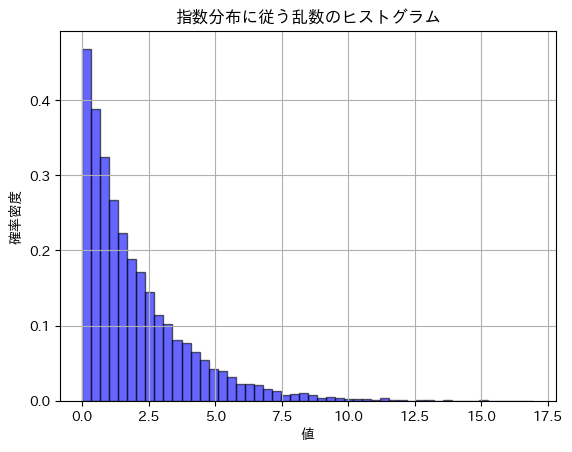

In [7]:
import random
import math
import matplotlib.pyplot as plt

def generate_exponential_random_variable(beta):
    U = random.random()
    x = -beta * math.log(U)
    return x

# β (lambda の逆数) の値を設定
beta = 2.0

# 10,000個の乱数を生成してリストに格納
num_samples = 10000
random_numbers = [generate_exponential_random_variable(beta) for _ in range(num_samples)]

# 最初の10個の乱数を表示
print("First 10 generated random numbers:")
print(random_numbers[:10])

# ヒストグラムをプロット
plt.hist(random_numbers, bins=50, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('値')
plt.ylabel('確率密度')
plt.title('指数分布に従う乱数のヒストグラム')
plt.grid(True)
plt.show()

- ガンマ分布  
ガンマ分布の確率密度関数は
$$p(x|\alpha,\beta)=\frac{\beta^\alpha}{\Gamma(\alpha)}x^{\alpha-1}\exp(-\beta x) (x\geq0)$$
である.  


まず,$\alpha$が整数の場合を考える.
$p(x|1,\beta)$のガンマ分布は期待値$\beta$の指数分布であることから,この指数分布に従う$\alpha$個の独立な乱数の和として,$p(x|\alpha,\beta)$のガンマ分布に従う乱数を生成することができる.  
__アルゴリズム7.4__ パラメータ$\alpha$,$\beta$のガンマ分布($\alpha$が正の整数)に従う乱数の生成  
1. アルゴリズム7.3を用いて,期待値$\beta$の指数分布に従う$\alpha$個の独立な乱数$x_1,x_2,\cdots,x_\alpha$を生成し,その和を返す.

First 10 generated random numbers:
[9.314662806416365, 16.701332047403326, 15.969604901997824, 9.214892821832157, 3.23546731657026, 7.422106476429495, 12.517367137909071, 14.369519580272799, 11.163388661844191, 4.070689504374461]


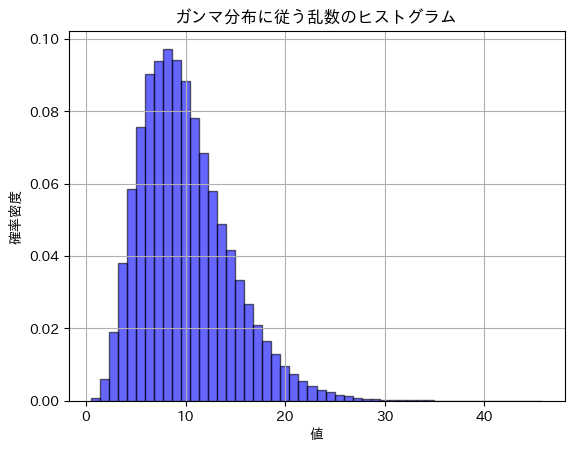

In [9]:
import random
import math
import matplotlib.pyplot as plt

def generate_exponential_random_variable(beta):
    U = random.random()
    x = -beta * math.log(U)
    return x

def generate_gamma_random_variable(alpha, beta):
    exponential_random_numbers = [generate_exponential_random_variable(beta) for _ in range(alpha)]
    gamma_random_variable = sum(exponential_random_numbers)
    return gamma_random_variable

# ガンマ分布のパラメータ
alpha = 5  # 正の整数
beta = 2.0

# 100,000個の乱数を生成してリストに格納
num_samples = 100000
random_numbers = [generate_gamma_random_variable(alpha, beta) for _ in range(num_samples)]

# 最初の10個の乱数を表示
print("First 10 generated random numbers:")
print(random_numbers[:10])

# ヒストグラムをプロット
plt.hist(random_numbers, bins=50, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('値')
plt.ylabel('確率密度')
plt.title('ガンマ分布に従う乱数のヒストグラム')
plt.grid(True)
plt.show()

次に$0<\alpha<1$の場合を考える.  
__アルゴリズム7.5__　パラメータ$\alpha$,$\beta$のガンマ分布($0<\alpha<1$)に従う乱数の生成
1. 一様乱数$U$を生成し,$p\leftarrow\frac{(\alpha+e)}{e},q\leftarrow pU$とする.
2. $q\leq1$ならばステップ2.aに,そうでなければステップ2.bに進む.  
 2.a. 一様乱数$U'$と$x\leftarrow q^{\frac{1}{\alpha}}$に対して,$U' 
      \leq\exp(-x)$ならばステップ3に進み,そうでなければステップ1に戻る.  
 2.b. 一様乱数$U''$と$x\leftarrow -\log\frac{p-q}{\alpha}$に対して,$U''\leq x^{\alpha-1}$ならばステップ3に進み,そうでなければステップ1に戻る. 
 3. $\beta x$を返す

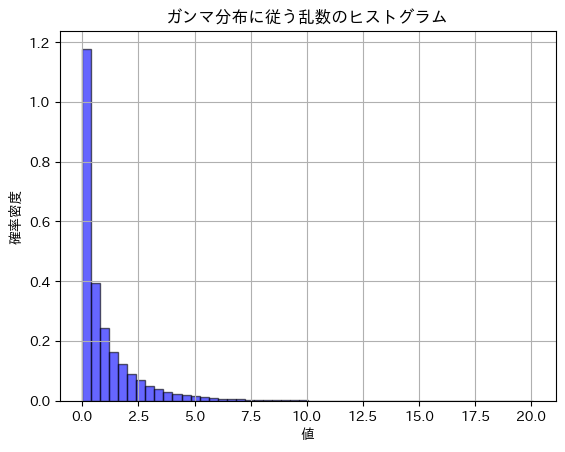

In [82]:
import random
import math
import matplotlib.pyplot as plt

def generate_exponential_random_variable(beta):
    U = random.uniform(0, 1)
    return -math.log(U) / beta

def generate_gamma_mixed_random_variable(alpha, beta):
    while True:
        U = random.uniform(0, 1)
        p = (alpha + math.e) / math.e
        q = p * U
        
        if q <= 1:
            x = q ** (1 / alpha)
            U_prime = random.uniform(0, 1)
            if U_prime <= math.exp(-x):
                return beta * x
        else:
            x = -math.log((p - q) / alpha)
            U_double_prime = random.uniform(0, 1)
            if U_double_prime <= x ** (alpha - 1):
                return beta * x

# 100,000個の乱数を生成してリストに格納
num_samples = 100000
alpha = 0.5
beta = 2.0
random_numbers = [generate_gamma_mixed_random_variable(alpha, beta) for _ in range(num_samples)]

# ヒストグラムを作成して表示
plt.hist(random_numbers, bins=50, density=True, alpha=0.6, color='b',edgecolor='black')
plt.title('ガンマ分布に従う乱数のヒストグラム')
plt.xlabel('値')
plt.ylabel('確率密度')
plt.grid(True)
plt.show()




アルゴリズム7.4とアルゴリズム7.5を組み合わせることで,任意の$\alpha$に対してガンマ分布に従う乱数を生成することができる.

__アルゴリズム7.6__ パラメータ$\alpha$,$\beta$のガンマ分布に従う乱数の生成
1. $\alpha$の整数部分を$\alpha_I$,$\alpha$の小数部分を$\alpha_F$とする.
2. アルゴリズム7.4を用いて,$p(x|\alpha_I,\beta)$のガンマ分布に従う乱数$x_I$を生成する.
3. アルゴリズム7.5を用いて,$p(x|\alpha_F,\beta)$のガンマ分布に従う乱数$x_F$を生成する.
4. $x_I+x_F$を返す.

First 10 generated random numbers:
[2.574223896297408, 2.043909190133757, 1.0800300836185073, 2.38676881664493, 1.40634196304452, 0.7790226070568087, 0.7313464255903639, 2.39362443239912, 2.413772746991814, 0.8362843687697039]


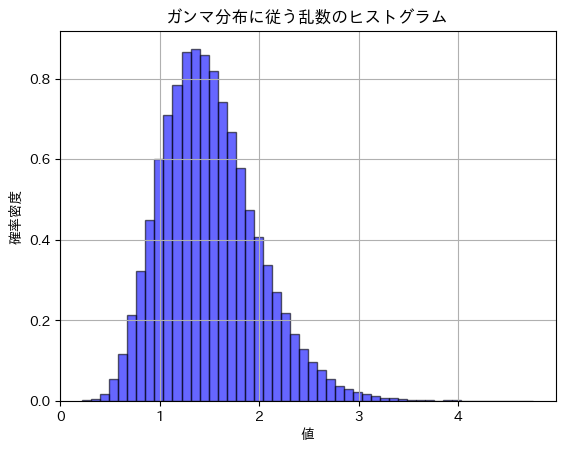

In [13]:
import random
import math
import matplotlib.pyplot as plt

def generate_exponential_random_variable(beta):
    U = random.random()
    x = -beta * math.log(U)
    return x

def generate_gamma_random_variable(alpha, beta):
    exponential_random_numbers = [generate_exponential_random_variable(beta) for _ in range(alpha)]
    gamma_random_variable = sum(exponential_random_numbers)
    return gamma_random_variable

def generate_gamma_mixed_random_variable(alpha, beta):
    alpha_I = int(alpha)
    alpha_F = alpha - alpha_I
    x_I = generate_gamma_random_variable(alpha_I, beta)

    # alpha_F の部分を複数回生成して平均を取る
    num_samples_F = 10
    x_F_samples = [generate_gamma_random_variable(1, beta) for _ in range(num_samples_F)]
    x_F = sum(x_F_samples) / num_samples_F

    return x_I + x_F

# ガンマ分布のパラメータ
alpha = 0.7
beta = 1.5

# 100,000個の乱数を生成してリストに格納
num_samples = 100000
random_numbers = [generate_gamma_mixed_random_variable(alpha, beta) for _ in range(num_samples)]

# 最初の10個の乱数を表示
print("First 10 generated random numbers:")
print(random_numbers[:10])

# ヒストグラムをプロット
plt.hist(random_numbers, bins=50, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('値')
plt.ylabel('確率密度')
plt.title('ガンマ分布に従う乱数のヒストグラム')
plt.grid(True)
plt.show()

- ワイブル分布  
ワイブル分布の確率密度関数は
$$p(x|\alpha,\beta)=\frac{\alpha}{\beta}\left(\frac{x}{\beta}\right)^{\alpha-1}\exp\left[-\left(\frac{x}{\beta}\right)^\alpha\right] (x\geq0)$$
である.
また,累積分布関数
$$F(x|\alpha,\beta)=1-\exp\left[-\left(\frac{x}{\beta}\right)^\alpha\right]$$
に対する逆関数は
$$F^{-1}(y|\alpha,\beta)=\beta\left(-\log(1-y)\right)^{\frac{1}{\alpha}}(0\leq y \leq 1)$$
である.そのため逆関数法を用いてワイブル分布に従う乱数を生成することができる.  

__アルゴリズム7.7__ パラメータ$\alpha$,$\beta$のワイブル分布に従う乱数$x$の生成
1. 一様乱数$U$を生成し,$\beta\left(-\log U \right)^{\frac{1}{\alpha}}$を返す.

First 10 generated random numbers:
[2.359110695465998, 1.1378367798641258, 0.7374933925580847, 2.9977968947659774, 2.6509636412702484, 2.1700481901107045, 2.6757016564540916, 2.184378241430551, 1.4749973184693768, 0.7934906619978948]


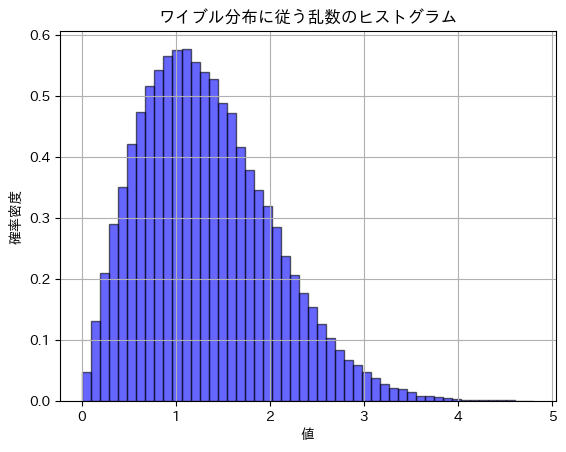

In [14]:
import random
import math
import matplotlib.pyplot as plt

def generate_weibull_random_variable(alpha, beta):
    U = random.random()
    x = beta * ((-math.log(U)) ** (1 / alpha))
    return x

# ワイブル分布のパラメータ
alpha = 2.0
beta = 1.5

# 100,000個の乱数を生成してリストに格納
num_samples = 100000
random_numbers = [generate_weibull_random_variable(alpha, beta) for _ in range(num_samples)]

# 最初の10個の乱数を表示
print("First 10 generated random numbers:")
print(random_numbers[:10])

# ヒストグラムをプロット
plt.hist(random_numbers, bins=50, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('値')
plt.ylabel('確率密度')
plt.title('ワイブル分布に従う乱数のヒストグラム')
plt.grid(True)
plt.show()

- 正規分布  
平均0,分散1の標準正規分布に従う乱数の生成法としては,ボックス・ミュラー法が有名である.
ボックス・ミュラー法は,一様乱数を2つ生成し,それらを用いて標準正規分布に従う乱数を生成する方法である.
あとは正規分布の性質に基づき,平均$\mu$,分散$\sigma^2$の正規分布に従う乱数を生成することができる.  

__アルゴリズム7.8__ 平均$\mu$,分散$\sigma^2$の正規分布に従う互いに独立な乱数$x_1,x_2$の生成
1. 一様乱数$U_1,U_2$を生成し,$$z_1\leftarrow\sqrt{-2\log U_1}\cos(2\pi U_2), z_2\leftarrow\sqrt{-2\log U_1}\sin(2\pi U_2)$$とする.
2. $x_1=\mu+\sigma z_1,x_2=\mu+\sigma z_2$を返す.

First 10 generated random numbers:
[(10.11155383136079, 12.000038457247857), (9.07106879358229, 8.000261217468568), (6.777717291585569, 10.466555392784914), (10.326166468630841, 10.861763433094637), (7.67192426467232, 8.828291936911514), (10.856820610965055, 9.940104668442522), (8.575370558563872, 6.498688331177277), (9.462854580292905, 10.54407598218125), (9.88545683694693, 9.522013069100877), (9.274602902988427, 8.476830980641667)]


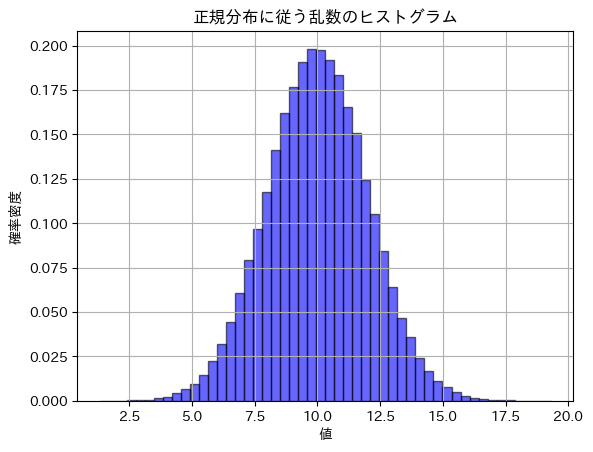

In [15]:
import random
import math
import matplotlib.pyplot as plt

def generate_normal_random_variables(mean, variance):
    U1 = random.random()
    U2 = random.random()
    z1 = math.sqrt(-2 * math.log(U1)) * math.cos(2 * math.pi * U2)
    z2 = math.sqrt(-2 * math.log(U1)) * math.sin(2 * math.pi * U2)
    x1 = mean + math.sqrt(variance) * z1
    x2 = mean + math.sqrt(variance) * z2
    return x1, x2

# 正規分布のパラメータ
mean = 10.0
variance = 4.0

# 100,000個の乱数を生成してリストに格納
num_samples = 100000
random_numbers = [generate_normal_random_variables(mean, variance) for _ in range(num_samples)]

# 最初の10個の乱数を表示
print("First 10 generated random numbers:")
print(random_numbers[:10])

# ヒストグラムをプロット
random_numbers_flat = [num for pair in random_numbers for num in pair]
plt.hist(random_numbers_flat, bins=50, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('値')
plt.ylabel('確率密度')
plt.title('正規分布に従う乱数のヒストグラム')
plt.grid(True)
plt.show()

-　対数正規分布
対数正規分布は,平均$\mu$,分散$\sigma^2$の正規分布に従う確率変数$X$に対して,$Y=\exp(X)$とすることで得られる分布であるため,正規分布に従う乱数を生成することで対数正規分布に従う乱数を生成することができる.

__アルゴリズム7.9__ パラメータ$\mu,\sigma^2$の対数正規分布に従う乱数の生成
1. アルゴリズム7.8を用いて,平均$\mu$,分散$\sigma^2$の正規分布に従う乱数$x$を生成する.
2. $y=\exp(x)$を返す.

First 10 generated random numbers:
[1.300194423864958, 3.0939851248836066, 3.7229190603205105, 6.612545975382954, 4.449690276235423, 1.0577547388608286, 3.0396373833476718, 1.8481602655271328, 2.411357714335259, 3.422748226249093]


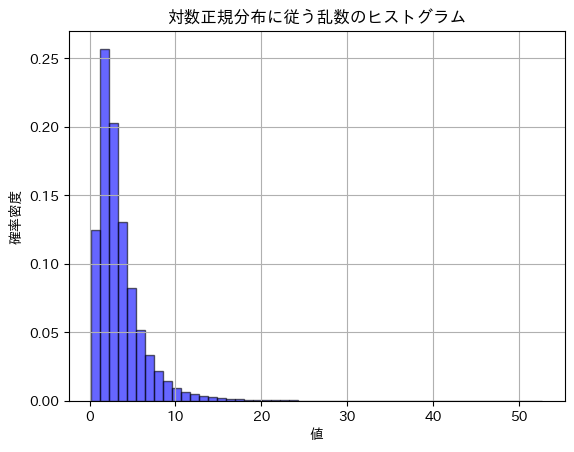

In [16]:
import random
import math
import matplotlib.pyplot as plt

def generate_normal_random_variables(mean, variance):
    U1 = random.random()
    U2 = random.random()
    z1 = math.sqrt(-2 * math.log(U1)) * math.cos(2 * math.pi * U2)
    x1 = mean + math.sqrt(variance) * z1
    return x1

def generate_lognormal_random_variable(mean, variance):
    x = generate_normal_random_variables(mean, variance)
    y = math.exp(x)
    return y

# 対数正規分布のパラメータ
mean = 1.0
variance = 0.5

# 100,000個の乱数を生成してリストに格納
num_samples = 100000
random_numbers = [generate_lognormal_random_variable(mean, variance) for _ in range(num_samples)]

# 最初の10個の乱数を表示
print("First 10 generated random numbers:")
print(random_numbers[:10])

# ヒストグラムをプロット
plt.hist(random_numbers, bins=50, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('値')
plt.ylabel('確率密度')
plt.title('対数正規分布に従う乱数のヒストグラム')
plt.grid(True)
plt.show()

- 逆ガウス分布  
確率密度関数
$$p(x|\mu,\xi)=\sqrt{\frac{\xi}{2\pi x^3}}\exp\left(-\frac{\xi(x-\mu)^2}{2\mu^2x}\right) (x\geq0)$$
をもつ逆ガウス分布の乱数の発生法としては,逆ガウス分布に従う確率変数$X$を$\frac{\xi(x-\mu)^2}{\mu^2x}$と変換したものが,自由度1の$\chi^2$分布に従うことを利用したものがある.

__アルゴリズム7.10__ パラメータ$\mu,\xi$の逆ガウス分布に従う乱数$z$の生成
1. アルゴリズム7.8により標準正規乱数$x$を生成し,$$y = \mu + \frac{\mu^2x^2}{2\xi}-\frac{\mu}{2\xi}\sqrt{4\mu\xi x^2+\mu^2x^4}$$を求める.
2. 一様乱数$U$を生成し,$U\leq\frac{\mu}{\mu+y}$ならば$z=y$を返し,そうでなければ$z=\frac{μ^2}{y}$を返す.

First 10 generated random numbers:
[0.5728178786639746, 2.237383447687799, 1.3165970897159205, 0.9193405435843462, 3.5874308548176086, 2.323870017461012, 0.6230797065688134, 0.2877859012610262, 0.1565696486027175, 0.24132685745030358]


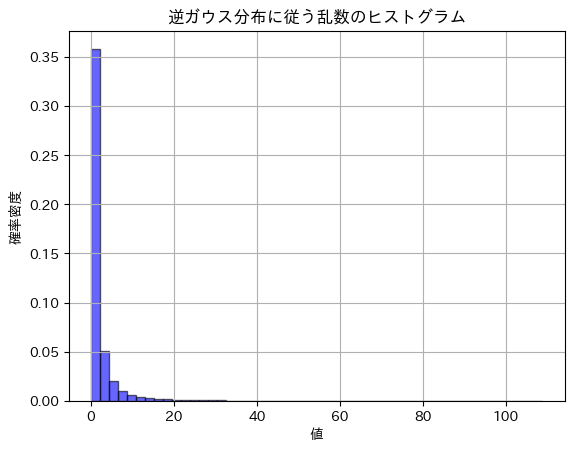

In [17]:
import random
import math
import matplotlib.pyplot as plt

def generate_normal_random_variables(mean, variance):
    U1 = random.random()
    U2 = random.random()
    z1 = math.sqrt(-2 * math.log(U1)) * math.cos(2 * math.pi * U2)
    x1 = mean + math.sqrt(variance) * z1
    return x1

def generate_inverse_gaussian_random_variable(mean, xi):
    x = generate_normal_random_variables(0, 1)
    y = mean + (mean ** 2 * x ** 2) / (2 * xi) - (mean / (2 * xi)) * math.sqrt(4 * mean * xi * x ** 2 + mean ** 2 * x ** 4)

    U = random.random()
    if U <= mean / (mean + y):
        z = y
    else:
        z = (mean ** 2) / y
    return z

# 逆ガウス分布のパラメータ
mean = 2.0
xi = 0.5

# 100,000個の乱数を生成してリストに格納
num_samples = 100000
random_numbers = [generate_inverse_gaussian_random_variable(mean, xi) for _ in range(num_samples)]

# 最初の10個の乱数を表示
print("First 10 generated random numbers:")
print(random_numbers[:10])

# ヒストグラムをプロット
plt.hist(random_numbers, bins=50, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('値')
plt.ylabel('確率密度')
plt.title('逆ガウス分布に従う乱数のヒストグラム')
plt.grid(True)
plt.show()

# 7.2 ポアソン過程のシュミレーション  

7.2.1 定常ポアソン過程
強度関数$\lambda$の定常ポアソン過程では,イベント間間隔が互いに独立に期待値$\frac{1}{\lambda}$の指数分布に従う.そのため,あるイベントの発生時刻に対して,次のイベントの発生時刻は,その時刻から期待値$\frac{1}{\lambda}$の指数分布に従う乱数を加えることで求めることができる.

__アルゴリズム7.11__ 観察期間$[0,T]$における強度$\lambda$の定常ポアソン過程のシュミレーション
1. $X\leftarrow0,i\leftarrow0$とする.
2. 以下を繰り返す.  
    2.1. 期待値$\frac{1}{\lambda}$の指数分布に従う乱数$E$を生成する.  
    2.2. $X\leftarrow X+E$とし,$X\leq T$ならば$i\leftarrow i+1,t_i=X$としてステップ2.1に戻り,$X>T$ならばステップ3に進む.
3. $t_1,t_2,\cdots,t_i$を返す.

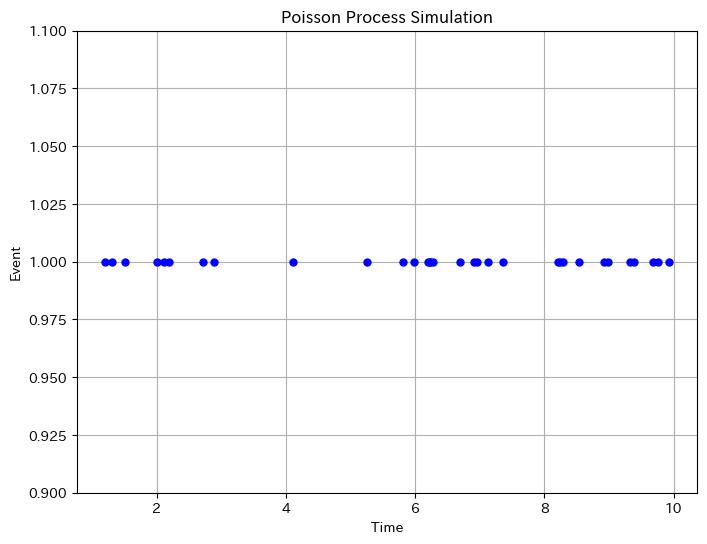

In [24]:
import random
import matplotlib.pyplot as plt

def simulate_poisson_process(lambd, T):
    X = 0
    i = 0
    event_times = []

    while True:
        E = random.expovariate(lambd)
        X += E

        if X <= T:
            i += 1
            event_times.append(X)
        else:
            break

    return event_times

# 強度と観察期間の設定
lambd = 2.5  # 強度
T = 10.0     # 観察期間

# ポアソン過程のシミュレーション
event_times = simulate_poisson_process(lambd, T)

# グラフのプロット
plt.figure(figsize=(8, 6))
plt.plot(event_times, [1] * len(event_times), 'bo', markersize=5)
plt.xlabel('Time')
plt.ylabel('Event')
plt.title('Poisson Process Simulation')
plt.ylim(0.9, 1.1)
plt.grid(True)
plt.show()

7.2.2 非定常ポアソン過程  
強度関数$\lambda(t)$の非定常ポアソン過程のシュミレーションを行うには,棄却法を拡張した__間引き法__(thinning method)が有用である.

__アルゴリズム7.12__ 観察期間$[0,T]$における強度$\lambda(t)$の非定常ポアソン過程のシュミレーション
1. $\lambda^*=\max\lambda(t),t^*\leftarrow0,i\leftarrow0$とする.
2. 以下を繰り返す.  
    2.1. 期待値$\frac{1}{\lambda^*}$の指数分布に従う乱数$E$を生成し,次のイベントの発生時刻の候補を$t^*\leftarrow t*+E$とする.$t^*>T$ならばステップ3に進む.  
    2.2. 採択確率$r\leftarrow\frac{\lambda(t^*)}{\lambda^*}$と一様乱数$U$を生成し,$U\leq r$ならば$t_i=t^*,i\leftarrow i+1$としてステップ2.1に戻り,$U>r$ならば$t^*$を棄却しステップ2.1に戻る.
3. $t_1,t_2,\cdots,t_i$を返す.

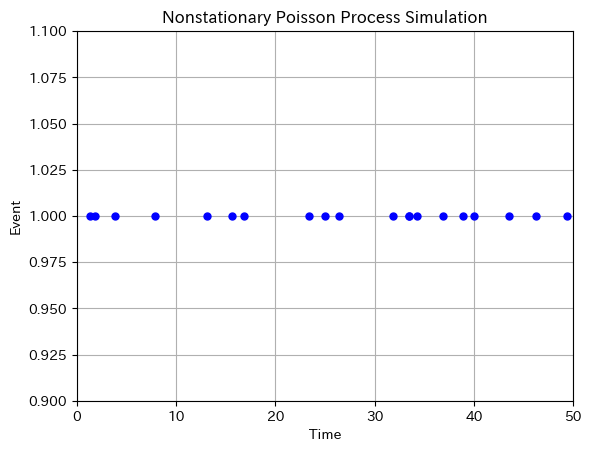

In [29]:
import random
import matplotlib.pyplot as plt

def simulate_nonstationary_poisson_process(intensity_function, T):
    t_star = 0
    lambda_star = None
    i = 0
    event_times = []

    while True:
        # Step 2.1: 期待値 1/lambda_star の指数分布に従う乱数 E を生成
        E = random.expovariate(1 / lambda_star) if lambda_star else random.expovariate(1)
        t_star += E

        if t_star > T:
            # t_star が観察期間を超えたら終了
            break

        # Step 2.2: 採択確率 r を計算
        current_lambda = intensity_function(t_star)
        r = current_lambda / lambda_star if lambda_star else 1.0

        # 一様乱数 U を生成
        U = random.uniform(0, 1)

        if U <= r:
            # イベント発生時刻を記録し、次のイベントへ
            i += 1
            event_times.append(t_star)

        if not lambda_star:
            lambda_star = current_lambda

    return event_times

# 非定常な強度を定義する関数
def intensity_function(t):
    return 2.5 + 0.5 * t  # 非定常な強度の例

T = 50.0  # 観察期間を 50 に設定

# ポアソン過程のシミュレーション
event_times = simulate_nonstationary_poisson_process(intensity_function, T)

# グラフのプロット
plt.plot(event_times, [1] * len(event_times), 'bo', markersize=5)
plt.xlabel('Time')
plt.ylabel('Event')
plt.title('Nonstationary Poisson Process Simulation')
plt.xlim(0, T)  # x軸の表示範囲を 0 から T までに設定
plt.ylim(0.9, 1.1)
plt.grid(True)
plt.show()

__アルゴリズム7.13__ 観察期間$[0,T]$における強度$\lambda(t)$の非定常ポアソン過程のシュミレーション

1. $\lambda^*=\max\lambda(t),t^*\leftarrow0,i\leftarrow0$とする.
2. 以下を繰り返す.  
    2.1. 期待値$\frac{1}{\lambda^*}$の指数分布に従う乱数$E$を生成し,次のイベントの発生時刻の候補を$t^*\leftarrow t*+E$とする.$t^*>T$ならばステップ3に進 む.  
    2.2. 採択確率$r\leftarrow\frac{\lambda(t^*)}{\lambda^*}$と一様乱数$U$を生成し,$U\leq r$ならば$t_i=t^*,i\leftarrow i+1$とする.そうでなければ候補を棄却する.  
    2.3. $\lambda^*\leftarrow\max_{t>t^*}\lambda(t)$としてステップ2.1に戻る.
3. $t_1,t_2,\cdots,t_i$を返す.

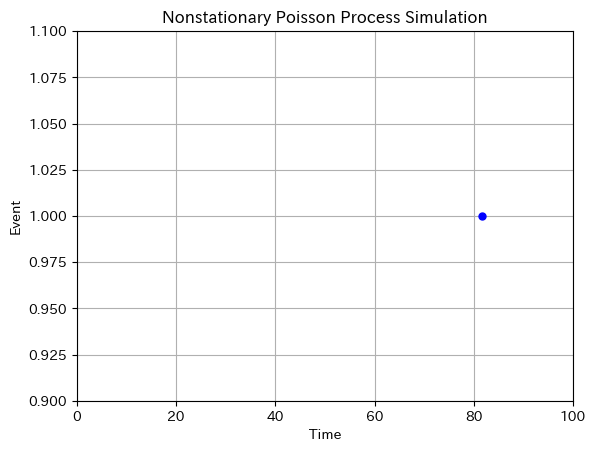

In [93]:
import random
import matplotlib.pyplot as plt

def simulate_nonstationary_poisson_process(intensity_function, T):
    t_star = 0
    lambda_star = max(intensity_function(t) for t in range(T))  # 観察期間内で最大の強度を求める
    i = 0
    event_times = []

    while True:
        # Step 2.1: 期待値 1/lambda_star の指数分布に従う乱数 E を生成
        E = random.expovariate(1 / lambda_star)
        t_star += E

        if t_star > T:
            # t_star が観察期間を超えたら終了
            break

        while True:
            # Step 2.2: 採択確率 r を計算
            current_lambda = intensity_function(t_star)
            r = current_lambda / lambda_star

            # 一様乱数 U を生成
            U = random.uniform(0, 1)

            if U <= r:
                # イベント発生時刻を記録し、次のイベントへ
                i += 1
                event_times.append(t_star)
                break
            else:
                # 候補を棄却し、新しい lambda_star を更新してループを継続
                t_star = t_star + random.expovariate(1 / lambda_star)
                lambda_star = max(intensity_function(t) for t in range(T) if t > t_star)

    return event_times

# 非定常な強度を定義する関数
def intensity_function(t):
    return 2.5 + 0.5 * t  # 非定常な強度の例

T = 100  # 観察期間を 100 に設定

# ポアソン過程のシミュレーション
event_times = simulate_nonstationary_poisson_process(intensity_function, T)

# グラフのプロット
plt.plot(event_times, [1] * len(event_times), 'bo', markersize=5)
plt.xlabel('Time')
plt.ylabel('Event')
plt.title('Nonstationary Poisson Process Simulation')
plt.xlim(0, T)  # x軸の表示範囲を 0 から T までに設定
plt.ylim(0.9, 1.1)
plt.grid(True)
plt.show()

# 7.3 更新過程のシュミレーション

__アルゴリズム7.14__ $t=0$を起点とする観察期間$[0,T]$の更新過程のシュミレーション

1. $X\leftarrow0,i\leftarrow0$とする.
2. 以下を繰り返す.  
    2.1. イベント間間隔の従う確率分布から乱数$\tau$を生成する.
    2.2. $X\leftarrow X+\tau$とし,$X\leq T$ならば$i\leftarrow i+1,t_i=X$としてステップ2.1に戻り,$X>T$ならばステップ3に進む.
3. $t_1,t_2,\cdots,t_i$を返す.

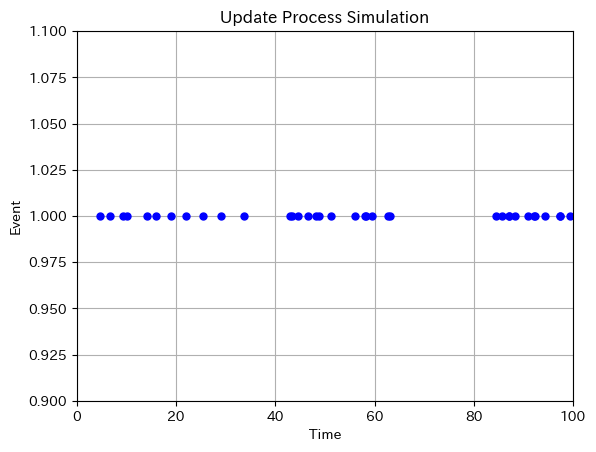

In [94]:
import random
import matplotlib.pyplot as plt

def simulate_update_process(prob_dist, T):
    X = 0
    i = 0
    event_times = []

    while True:
        # Step 2.1: イベント間間隔の従う確率分布から乱数 tau を生成
        tau = random.expovariate(prob_dist)

        # Step 2.2: X に tau を加える
        X += tau

        if X <= T:
            # X が観察期間内ならばイベント時刻を記録し、次のイベントへ
            i += 1
            event_times.append(X)
        else:
            # X が観察期間を超えたら終了
            break

    return event_times

# 確率分布のパラメータを指定
lambda_param = 0.5

# 観察期間を 100 に設定
T = 100

# 更新過程のシミュレーション
event_times = simulate_update_process(lambda_param, T)

# グラフのプロット
plt.plot(event_times, [1] * len(event_times), 'bo', markersize=5)
plt.xlabel('Time')
plt.ylabel('Event')
plt.title('Update Process Simulation')
plt.xlim(0, T)  # x軸の表示範囲を 0 から T までに設定
plt.ylim(0.9, 1.1)
plt.grid(True)
plt.show()

__アルゴリズム7.15__ 観察期間$[0,T]$の定常更新過程のシュミレーション

1. 十分大きな$m$(例えば$m=10000$)に対して,アルゴリズム7.14を用いて$t=-mT$を起点とする観察期間$[-mT,T]$の更新過程のシュミレーションを行い,得られたイベント発生時刻を$t_1,t_2,\cdots,t_i$とする.
2. 得られたイベント発生時刻のうち,観察期間$[0,T]$に含まれる発生時刻${t_k,t_{k+1},\cdots,t_n}$を返す.

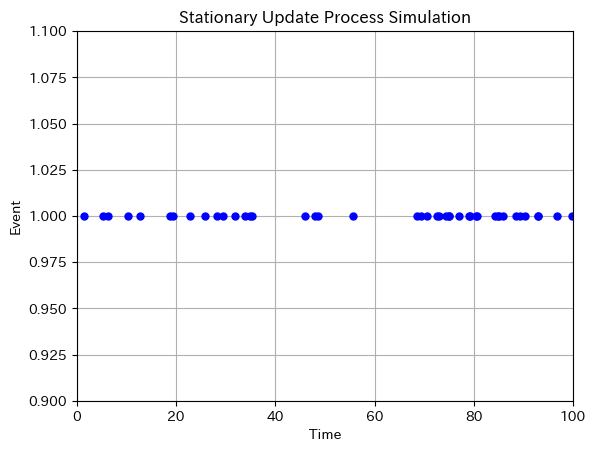

In [95]:
import random
import matplotlib.pyplot as plt

def simulate_update_process(prob_dist, T):
    X = 0
    i = 0
    event_times = []

    while True:
        # Step 2.1: イベント間間隔の従う確率分布から乱数 tau を生成
        tau = random.expovariate(prob_dist)

        # Step 2.2: X に tau を加える
        X += tau

        if X <= T:
            # X が観察期間内ならばイベント時刻を記録し、次のイベントへ
            i += 1
            event_times.append(X)
        else:
            # X が観察期間を超えたら終了
            break

    return event_times

def simulate_stationary_update_process(prob_dist, T, m):
    # Step 1: 観察期間 [-mT, T] の更新過程のシミュレーション
    event_times_full = simulate_update_process(prob_dist, T * m)

    # Step 2: 観察期間 [0, T] に含まれるイベント時刻を抽出
    event_times = [t for t in event_times_full if t >= 0]

    return event_times

# 確率分布のパラメータを指定
lambda_param = 0.5

# 観察期間を 100 に設定
T = 100

# m の値を指定
m = 10000

# 定常更新過程のシミュレーション
event_times = simulate_stationary_update_process(lambda_param, T, m)

# グラフのプロット
plt.plot(event_times, [1] * len(event_times), 'bo', markersize=5)
plt.xlabel('Time')
plt.ylabel('Event')
plt.title('Stationary Update Process Simulation')
plt.xlim(0, T)  # x軸の表示範囲を 0 から T までに設定
plt.ylim(0.9, 1.1)
plt.griアルゴリズム 7.11d(True)
plt.show()

# 7.4 Hawkes過程のシュミレーション

__アルゴリズム7.16__ 観察期間$[0,T]$における条件付き強度関数$\lambda(t|\mathcal{H}_t)=\mu+\sum_{t_i<t}g(t-t_i)$のHawkes過程のシュミレーション($g(.)$が単調減少関数の場合)

1. $\lambda^*=\mu,t^*\leftarrow0,i\leftarrow0$とする.
2. 以下を繰り返す.  
    2.1. 期待値$\frac{1}{\lambda^*}$の指数分布に従う乱数$E$を生成し,次のイベントの発生時刻の候補を$t^*\leftarrow t*+E$とする.$t^*>T$ならばステップ3に進む.  
    2.2. 採択確率$r\leftarrow\frac{\lambda(t^*|\mathcal{H}_{t^*})}{\lambda^*}$と一様乱数$U$を生成し,$U\leq r$ならば$t_i=t^*,i\leftarrow i+1$としてステップ2.1に戻り,$U>r$ならば$t^*$を棄却しステップ2.1に戻る.  
    2.3. 候補が採択された場合は$\lambda^*\leftarrow\lambda(t^*|\mathcal{H}_{t^*})+g(0)$,棄却された場合は$\lambda^*\leftarrow\lambda(t^*|\mathcal{H}_{t^*})$としてステップ2.1に戻る.
3. $t_1,t_2,\cdots,t_i$を返す.

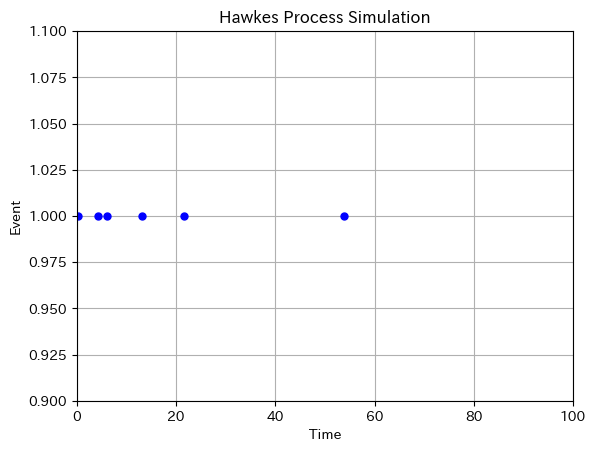

In [60]:
import random
import matplotlib.pyplot as plt

def conditional_intensity(t, event_times, mu, g):
    intensity = mu

    for t_i in event_times:
        if t_i < t:
            intensity += g(t - t_i)

    return intensity

def simulate_hawkes_process(mu, T, g):
    lambda_star = mu
    t_star = 0
    i = 0
    event_times = []

    while True:
        # Step 2.1: 期待値 1/lambda_star の指数分布から乱数 E を生成
        E = random.expovariate(1 / lambda_star)

        # Step 2.2: 次のイベントの候補 t_star を更新
        t_star += E

        if t_star > T:
            # t_star が観察期間を超えたら終了
            break

        # Step 2.3: 採択確率 r を計算
        lambda_t_star = conditional_intensity(t_star, event_times, mu, g)
        r = lambda_t_star / lambda_star

        # 一様乱数 U を生成
        U = random.uniform(0, 1)

        if U <= r:
            # 候補が採択された場合
            i += 1
            event_times.append(t_star)
            lambda_star = lambda_t_star + g(0)
        else:
            # 候補が棄却された場合
            lambda_star = lambda_t_star

    return event_times

# パラメータを設定
mu = 1.0
T = 100.0

# 単調減少関数 g(t - t_i) の定義
def g(t):
    return 0.5 * t

# Hawkes過程のシミュレーション
event_times = simulate_hawkes_process(mu, T, g)

# グラフのプロット
plt.plot(event_times, [1] * len(event_times), 'bo', markersize=5)
plt.xlabel('Time')
plt.ylabel('Event')
plt.title('Hawkes Process Simulation')
plt.xlim(0, T)  # x軸の表示範囲を 0 から T までに設定
plt.ylim(0.9, 1.1)
plt.grid(True)
plt.show()

__アルゴリズム7.17__ 観察期間$[0,T]$における条件付き強度関数$\lambda_k(t|\mathcal{H}_t)=\mu_k+\sum_{t_j<t}g_{k,k_j}(t-t_i)(k=1,2,\cdots,M)$の多次元Hawkes過程のシュミレーション($g_{k,l}(.)$が単調減少関数の場合)

1. $\lambda^*\leftarrow\sum_{k=1}^M\mu_k,t^*\leftarrow0,i\leftarrow0$とする.
2. 以下を繰り返す.
     2.1. 期待値$\frac{1}{\lambda^*}$の指数分布に従う乱数$E$を生成し,次のイベントの発生時刻の候補を$t^*\leftarrow t*+E$とする.$t^*>T$ならばステップ3に進む.  
     2.2. 採択確率$r\leftarrow\frac{\lambda(t^*|\mathcal{H}_{t^*})}{\lambda^*}$と一様乱数$U$を生成し,$U\leq r$ならば$t_i=t^*,i\leftarrow i+1$としてステップ2.1に戻り,$U>r$ならば$t^*$を棄却しステップ2.1に戻る.  
     2.3. 候補が採択された場合は,確率分布$P^*(k|\mathcal{H}_{t^*})=\frac{\lambda_k(t^*|\mathcal{H}_{t^*})}{\lambda(t^*|\mathcal{H}_{t^*})}$に従う乱数$K$を生成し,$k_i=K$とし,$\lambda^*\leftarrow\lambda(t^*|\mathcal{H}_{t^*})+\sum_{k=1}^Mg_{k,k_i}(0)$,棄却された場合は$\lambda^*\leftarrow\lambda(t^*|\mathcal{H}_{t^*})$としてステップ2.1に戻る.
3. $(t_1,k_1),(t_2,k_2),\cdots,(t_i,k_i)$を返す.


Event times:  [0.2464886849152104, 0.25177638146391157, 0.3496071421488389, 0.7874483631468447, 1.0763862793871917, 1.0853190895043847, 1.4938371832867903, 1.6140664571229315, 1.8258692195835624, 1.868304421085503, 1.9757750831586054, 2.847372262153338, 3.679820003894568, 3.871313860947037, 3.881089819119218, 4.248315077109702, 4.680641326326368, 4.754834947909475, 5.636532233490453, 6.1301301831882204, 6.540144479192323, 6.555366120605502, 6.872675299756716, 6.896736665662033, 8.126445315451285, 8.325791183002446, 9.654350353120893]
Event types:  [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0]


/tmp/ipykernel_1097894/1573271098.py:57: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t, k, use_line_collection=True)


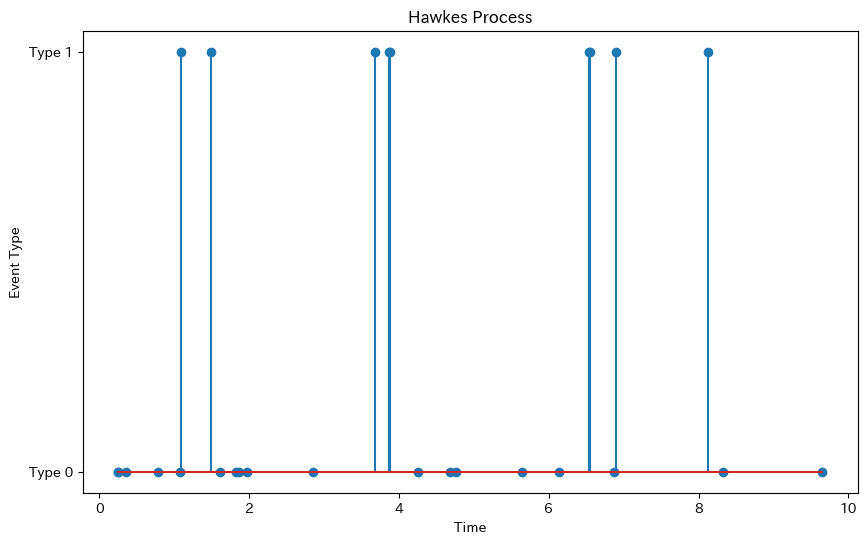

In [71]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_hawkes_process(mu, alpha, beta, T):
    """
    mu:    M-dimensional vector of base intensities.
    alpha: MxM matrix of influence of event j on event i.
    beta:  MxM matrix of decay rates of influence of event j on event i.
    T:     Observation window length.
    """

    M = len(mu)    # Number of event types.
    t = [0]        # List of event times.
    k = [0]        # List of event types.
    lambda_star = sum(mu)    # Initialize lambda_star.

    while True:
        E = np.random.exponential(1/lambda_star)    # Exponential random variable.
        t_star = t[-1] + E    # Candidate for next event time.

        if t_star > T:
            break    # If candidate is out of observation window, stop the loop.

        lambda_t_star = sum([mu[i] + sum([alpha[i,j] * np.exp(-beta[i,j]*(t_star - t_m))
                                          for t_m, j in zip(t,k) if t_m < t_star])
                             for i in range(M)])    # Compute intensity at t_star.

        U = np.random.uniform(0, lambda_star)    # Uniform random variable.

        if U <= lambda_t_star:    # If candidate is accepted.
            t.append(t_star)    # Add candidate to the list of event times.
            P = [mu[i] + sum([alpha[i,j] * np.exp(-beta[i,j]*(t_star - t_m))
                              for t_m, j in zip(t[:-1],k) if t_m < t_star])
                 for i in range(M)]    # Probabilities for each type of event.
            P = P / sum(P)    # Normalize probabilities.
            K = np.random.choice(range(M), p=P)    # Draw event type from distribution.
            k.append(K)    # Add event type to the list.
            lambda_star = lambda_t_star + alpha[K, K]    # Update lambda_star.
        else:
            lambda_star = lambda_t_star    # If candidate is rejected, update lambda_star.

    return t[1:], k[1:]    # Return event times and types (excluding initial zeros).

# Example usage:
mu = np.array([0.2, 0.3])    # Base intensities.
alpha = np.array([[0.5, 0.1], [0.1, 0.5]])    # Influence matrix.
beta = np.array([[1, 1], [1, 1]])    # Decay rate matrix.
T = 10    # Observation window length.

t, k = simulate_hawkes_process(mu, alpha, beta, T)

print("Event times: ", t)
print("Event types: ", k)

# Plot the simulated process.
plt.figure(figsize=(10,6))
plt.stem(t, k, use_line_collection=True)
plt.xlabel('Time')
plt.ylabel('Event Type')
plt.title('Hawkes Process')
plt.yticks([0, 1], ['Type 0', 'Type 1'])
plt.show()